# Data Analysis & Visualization Lab Project  
## Crimes Against Women (2016–2022) – Python End‑to‑End Pipeline

This notebook demonstrates a **complete data analysis and visualization workflow** using:

- **Python**
- **pandas**
- **NumPy**
- **Matplotlib**
- **Seaborn**
- **Plotly**
- **scikit‑learn**
- **SciPy**

We work with two Excel files:

1. `women 2016.xlsx`  
2. `women 2017 to 2022.xlsx`  

Our main goal is to **combine, clean, explore, model, and visualize** these datasets to generate insights about crimes against women over time.

> **Very important data rule:** The value **`0` is a *valid* value** in this dataset (e.g., “0 cases reported”). We will **never** treat `0` as missing data or convert `0` to `NaN`. Only true nulls (`NaN` / `None`) will be considered missing.


---
## 1. Data Loading & Merging

In this section we:

1. Import all required libraries.  
2. Load both Excel workbooks.  
3. Inspect basic structure and metadata.  
4. Align the schemas (column names / data types).  
5. Concatenate all years into **one clean DataFrame `df`**.  

Throughout this section we **explicitly ensure that `0` is never treated as missing**.


In [1]:
# 1.1 Import all necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy import stats

# Set global plotting styles
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# For reproducibility of any random operations
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
# 1.2 Load the Excel files

# File paths (assumes the notebook is in the same folder as the Excel files)
path_2016 = "women 2016.xlsx"
path_2017_2022 = "women 2017 to 2022.xlsx"

df_2016 = pd.read_excel(path_2016)
df_2017_2022 = pd.read_excel(path_2017_2022)

print("2016 data shape:", df_2016.shape)
print("2017-2022 data shape:", df_2017_2022.shape)

2016 data shape: (817, 17)
2017-2022 data shape: (5322, 23)


In [7]:
# 1.3 Quick structural overview of both DataFrames

print("\n=== 2016 DataFrame info ===")
display(df_2016.head())
print(df_2016.info())

print("\n=== 2017–2022 DataFrame info ===")
display(df_2017_2022.head())
print(df_2017_2022.info())


=== 2016 DataFrame info ===


,id,year,state_name,state_code,district_name,district_code,registration_circles,Total Rape,kidnapping_and_abduction,Dowry Deaths,Assaults,Domestic Violence,Human Trafficking,abetment_of_suicides_of_women,cyber crimes,Acid Attacks,Miscarriage Deaths
0,0,2016,Andhra Pradesh,28,Anantapur,502,Anantapur,48,55,236,375,130,6,52,0,0,0
1,1,2016,Andhra Pradesh,28,Chittoor,503,Chittoor,33,9,13,138,196,4,0,0,0,0
2,2,2016,Andhra Pradesh,28,Y.S.R.,504,Cuddapah,47,14,12,370,332,13,0,0,0,0
3,3,2016,Andhra Pradesh,28,East Godavari,505,East Godavari,142,21,17,559,544,36,35,4,3,0
4,4,2016,Andhra Pradesh,28,Anantapur,502,Guntakal Railway,0,1,2,8,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             817 non-null    int64 
 1   year                           817 non-null    int64 
 2   state_name                     817 non-null    object
 3   state_code                     817 non-null    int64 
 4   district_name                  817 non-null    object
 5   district_code                  817 non-null    int64 
 6   registration_circles           817 non-null    object
 7   Total Rape                     817 non-null    int64 
 8   kidnapping_and_abduction       817 non-null    int64 
 9   Dowry Deaths                   817 non-null    int64 
 10  Assaults                       817 non-null    int64 
 11  Domestic Violence              817 non-null    int64 
 12  Human Trafficking              817 non-null    int64 
 13  abetm

,id,year,state_name,state_code,district_name,district_code,registration_circles,total rapes,Rape above 18,rapes below 18,...,Acid Attacks,Domestic Violence,Kidnapping and Abduction,kidnp_and_abductn_of_women_above_18_for_marrg,kidnp_and_abductn_of_girls_below_18_for_marrg,human tracficking,total assaults,Assault above 18,assault below 18,cyber crimes
0,0,2017,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,54,30,24,...,0,471,50,7,25,38,428,415,13,0
1,1,2017,Andhra Pradesh,28,Chittoor,503,Chittoor,39,10,29,...,0,212,8,1,2,2,183,175,8,0
2,2,2017,Andhra Pradesh,28,Y.S.R.,504,Cuddapah,62,27,35,...,0,481,8,1,6,21,560,549,11,0
3,3,2017,Andhra Pradesh,28,East Godavari,505,East Godavari,120,28,92,...,1,601,15,4,0,6,636,589,47,1
4,4,2017,Andhra Pradesh,28,Ananthapuramu,502,Guntakal Railway,0,0,0,...,0,1,0,0,0,0,9,7,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   id                                             5322 non-null   int64 
 1   year                                           5322 non-null   int64 
 2   state_name                                     5322 non-null   object
 3   state_code                                     5322 non-null   int64 
 4   district_name                                  5322 non-null   object
 5   district_code                                  5322 non-null   int64 
 6   registration_circles                           5322 non-null   object
 7   total rapes                                    5322 non-null   int64 
 8   Rape above 18                                  5322 non-null   int64 
 9   rapes below 18                                 5322 non-null   

### 1.4 Column name alignment

Sometimes the same concept has slightly different column names across files  
(for example, `"Rape"` vs `"Rape Cases"`, or `"year"` vs `"Year"`).

Below we:

1. (Optionally) define renaming dictionaries for each DataFrame. You can edit these if you know specific mismatches.  
2. Normalize the **`Year`** column name if needed.  
3. Inspect which columns are unique to each file to decide if extra manual renaming is needed.

> Even during schema alignment **we do not touch the data values**. We only rename columns.


In [8]:
# 1.4.1 Optional manual column renaming (edit this if your files use different labels)

# Example: if 2016 file has 'Rape Cases' and 2017–2022 has 'Rape', you might write:
# column_rename_2016 = {"Rape Cases": "Rape"}
# column_rename_2017_2022 = {}

column_rename_2016 = {}
column_rename_2017_2022 = {}

df_2016 = df_2016.rename(columns=column_rename_2016)
df_2017_2022 = df_2017_2022.rename(columns=column_rename_2017_2022)

print("Renaming (if any) applied.")

Renaming (if any) applied.


In [9]:
# 1.4.2 Make sure the 'Year' column is present and consistently named

def normalize_year_column(df, default_year=None):
    """Ensure that a DataFrame has a 'Year' column.

    If a column whose name (stripped and lowercased) equals 'year' exists,
    we rename it to 'Year'. Otherwise, if default_year is given, we create
    a 'Year' column with that constant value.

    This function does NOT modify any data values.

    """
    # Find an existing column that represents year
    year_col = None
    for col in df.columns:
        if str(col).strip().lower() == "year":
            year_col = col
            break

    if year_col is not None and year_col != "Year":
        df = df.rename(columns={year_col: "Year"})
    elif year_col is None and default_year is not None:
        df["Year"] = default_year

    return df

df_2016 = normalize_year_column(df_2016, default_year=2016)
df_2017_2022 = normalize_year_column(df_2017_2022, default_year=None)

print("'Year' column after normalization:")
print("2016 columns:", df_2016.columns.tolist())
print("2017–2022 columns:", df_2017_2022.columns.tolist())

'Year' column after normalization:
2016 columns: ['id', 'Year', 'state_name', 'state_code', 'district_name', 'district_code', 'registration_circles', 'Total Rape', 'kidnapping_and_abduction', 'Dowry Deaths', 'Assaults', 'Domestic Violence', 'Human Trafficking', 'abetment_of_suicides_of_women', 'cyber crimes', 'Acid Attacks', 'Miscarriage Deaths']
2017–2022 columns: ['id', 'Year', 'state_name', 'state_code', 'district_name', 'district_code', 'registration_circles', 'total rapes', 'Rape above 18', 'rapes below 18', 'Dowry Deaths', 'abetment_to_suicide_of_women', 'miscarriage', 'Acid Attacks', 'Domestic Violence', 'Kidnapping and Abduction', 'kidnp_and_abductn_of_women_above_18_for_marrg', 'kidnp_and_abductn_of_girls_below_18_for_marrg', 'human tracficking', 'total assaults', 'Assault above 18', 'assault below 18', 'cyber crimes']


In [10]:
# 1.4.3 Inspect column overlap

cols_2016 = set(df_2016.columns)
cols_2017_2022 = set(df_2017_2022.columns)

print("Columns only in 2016 file:", sorted(cols_2016 - cols_2017_2022))
print("Columns only in 2017–2022 file:", sorted(cols_2017_2022 - cols_2016))
print("Common columns:", len(cols_2016 & cols_2017_2022))

Columns only in 2016 file: ['Assaults', 'Human Trafficking', 'Miscarriage Deaths', 'Total Rape', 'abetment_of_suicides_of_women', 'kidnapping_and_abduction']
Columns only in 2017–2022 file: ['Assault above 18', 'Kidnapping and Abduction', 'Rape above 18', 'abetment_to_suicide_of_women', 'assault below 18', 'human tracficking', 'kidnp_and_abductn_of_girls_below_18_for_marrg', 'kidnp_and_abductn_of_women_above_18_for_marrg', 'miscarriage', 'rapes below 18', 'total assaults', 'total rapes']
Common columns: 11


### 1.5 Schema alignment and row-wise concatenation

To concatenate the two DataFrames safely we:

1. Compute the **full set of columns** across both files.  
2. For each DataFrame, **add any missing columns** with sensible default values:  
   - For numeric columns → default `0` (remember: `0` is a valid data value and *not* missing).  
   - For non-numeric columns → default `"Unknown"`.  
3. Reorder columns so both DataFrames have the **same column order**.  
4. Concatenate row-wise with `pd.concat(..., axis=0)`.  

We do **not** introduce any `NaN` values during this merge step.


In [11]:
# 1.5 Align schemas and concatenate without introducing NaNs

# Determine the union of all columns
all_cols = list(sorted(set(df_2016.columns).union(set(df_2017_2022.columns))))

# Decide default values based on data types seen in either DataFrame
default_values = {}
for col in all_cols:
    # Prefer dtype from 2016, otherwise from 2017–2022
    if col in df_2016.columns:
        sample_dtype = df_2016[col].dtype
    else:
        sample_dtype = df_2017_2022[col].dtype

    if np.issubdtype(sample_dtype, np.number):
        default_values[col] = 0           # 0 is a valid numeric value
    else:
        default_values[col] = "Unknown"   # placeholder for categorical/text columns

def align_columns(df, all_columns, defaults):
    """Return a copy of df with all_columns present.
    Missing columns are filled with specified defaults.

    This function NEVER treats 0 as missing.

    """
    df_aligned = df.copy()
    for col in all_columns:
        if col not in df_aligned.columns:
            df_aligned[col] = defaults[col]
    # Reorder columns for consistency
    df_aligned = df_aligned[all_columns]
    return df_aligned

df_2016_aligned = align_columns(df_2016, all_cols, default_values)
df_2017_2022_aligned = align_columns(df_2017_2022, all_cols, default_values)

# Concatenate row-wise
df = pd.concat([df_2016_aligned, df_2017_2022_aligned], axis=0, ignore_index=True)

print("Combined DataFrame shape:", df.shape)
display(df.head())

Combined DataFrame shape: (6139, 29)


,Acid Attacks,Assault above 18,Assaults,Domestic Violence,Dowry Deaths,Human Trafficking,Kidnapping and Abduction,Miscarriage Deaths,Rape above 18,Total Rape,...,kidnapping_and_abduction,kidnp_and_abductn_of_girls_below_18_for_marrg,kidnp_and_abductn_of_women_above_18_for_marrg,miscarriage,rapes below 18,registration_circles,state_code,state_name,total assaults,total rapes
0,0,0,375,130,236,6,0,0,0,48,...,55,0,0,0,0,Anantapur,28,Andhra Pradesh,0,0
1,0,0,138,196,13,4,0,0,0,33,...,9,0,0,0,0,Chittoor,28,Andhra Pradesh,0,0
2,0,0,370,332,12,13,0,0,0,47,...,14,0,0,0,0,Cuddapah,28,Andhra Pradesh,0,0
3,3,0,559,544,17,36,0,0,0,142,...,21,0,0,0,0,East Godavari,28,Andhra Pradesh,0,0
4,0,0,8,1,2,0,0,0,0,0,...,1,0,0,0,0,Guntakal Railway,28,Andhra Pradesh,0,0


> **Check:** We have not used any operation like `replace(0, NaN)` or `na_values=[0]`.  
> The numeric value `0` is preserved as a legitimate data value throughout the loading and merging process.


---
## 2. Data Preprocessing

Now we move from raw combined data to a **clean and analysis-ready** dataset.

Steps:

1. Inspect overall structure (`.info()`, `.describe()`).  
2. Check for **true missing values** (only `NaN` / `None`).  
3. Detect and handle duplicate rows.  
4. Identify and treat outliers (IQR-based winsorization).  
5. Perform basic feature engineering.  
6. Encode categorical variables for modeling.  

At every step, we respect the rule that **`0` is a valid value and is never treated as missing**.


In [12]:
# 2.1 Basic structure and summary statistics of the combined data

print("Combined DataFrame info:")
print(df.info())

print("\nDescriptive statistics for numeric columns:")
display(df.describe())

print("\nDescriptive statistics for all columns (including categorical):")
display(df.describe(include="all"))

Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Acid Attacks                                   6139 non-null   int64 
 1   Assault above 18                               6139 non-null   int64 
 2   Assaults                                       6139 non-null   int64 
 3   Domestic Violence                              6139 non-null   int64 
 4   Dowry Deaths                                   6139 non-null   int64 
 5   Human Trafficking                              6139 non-null   int64 
 6   Kidnapping and Abduction                       6139 non-null   int64 
 7   Miscarriage Deaths                             6139 non-null   int64 
 8   Rape above 18                                  6139 non-null   int64 
 9   Total Rape                            

,Acid Attacks,Assault above 18,Assaults,Domestic Violence,Dowry Deaths,Human Trafficking,Kidnapping and Abduction,Miscarriage Deaths,Rape above 18,Total Rape,...,human tracficking,id,kidnapping_and_abduction,kidnp_and_abductn_of_girls_below_18_for_marrg,kidnp_and_abductn_of_women_above_18_for_marrg,miscarriage,rapes below 18,state_code,total assaults,total rapes
count,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,...,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000
mean,0.195309,87.092197,14.994462,135.937612,21.655807,0.469946,57.377097,0.095618,29.469946,7.277407,...,4.536081,2360.729272,10.507737,2.071021,16.130151,0.223326,43.140251,17.653364,109.595211,72.610197
std,0.637283,148.697910,71.564463,216.101122,60.756499,4.806541,98.756067,1.776942,43.776297,30.074878,...,17.596139,1624.620729,47.962440,12.742474,44.420968,1.296712,56.029115,9.846214,173.635167,86.699620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,767.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,4.000000,3.000000
50%,0.000000,33.000000,0.000000,52.000000,4.000000,0.000000,13.000000,0.000000,14.000000,0.000000,...,0.000000,2252.000000,0.000000,0.000000,0.000000,0.000000,28.000000,19.000000,48.000000,49.000000
75%,0.000000,119.000000,0.000000,169.000000,17.000000,0.000000,78.000000,0.000000,39.000000,0.000000,...,2.000000,3786.500000,0.000000,0.000000,7.000000,0.000000,61.000000,24.000000,157.000000,106.000000
max,10.000000,2644.000000,2608.000000,3227.000000,1009.000000,206.000000,1349.000000,91.000000,510.000000,713.000000,...,389.000000,5321.000000,1142.000000,204.000000,800.000000,31.000000,652.000000,38.000000,3276.000000,1051.000000



Descriptive statistics for all columns (including categorical):


,Acid Attacks,Assault above 18,Assaults,Domestic Violence,Dowry Deaths,Human Trafficking,Kidnapping and Abduction,Miscarriage Deaths,Rape above 18,Total Rape,...,kidnapping_and_abduction,kidnp_and_abductn_of_girls_below_18_for_marrg,kidnp_and_abductn_of_women_above_18_for_marrg,miscarriage,rapes below 18,registration_circles,state_code,state_name,total assaults,total rapes
count,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,...,6139.000000,6139.000000,6139.000000,6139.000000,6139.000000,6139,6139.000000,6139,6139.000000,6139.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1001,NaN,36,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Grp,NaN,Uttar Pradesh,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42,NaN,552,NaN,NaN
mean,0.195309,87.092197,14.994462,135.937612,21.655807,0.469946,57.377097,0.095618,29.469946,7.277407,...,10.507737,2.071021,16.130151,0.223326,43.140251,NaN,17.653364,NaN,109.595211,72.610197
std,0.637283,148.697910,71.564463,216.101122,60.756499,4.806541,98.756067,1.776942,43.776297,30.074878,...,47.962440,12.742474,44.420968,1.296712,56.029115,NaN,9.846214,NaN,173.635167,86.699620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,9.000000,NaN,4.000000,3.000000
50%,0.000000,33.000000,0.000000,52.000000,4.000000,0.000000,13.000000,0.000000,14.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,NaN,19.000000,NaN,48.000000,49.000000
75%,0.000000,119.000000,0.000000,169.000000,17.000000,0.000000,78.000000,0.000000,39.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,61.000000,NaN,24.000000,NaN,157.000000,106.000000


In [13]:
# 2.2 Check for true missing values (NaN/None only)

missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column (NaN/None only):")
display(missing_counts.head(20))

total_missing = missing_counts.sum()
print(f"Total missing values in the combined dataset: {total_missing}")

# Important note printed explicitly
if total_missing == 0:
    print("\nThere are NO missing (NaN) values in the original combined data.")
else:
    print("\nSome true missing values (NaN) exist. We will handle them carefully later.")

print("\nNotice that we did NOT treat 0 as missing anywhere. Only NaN/None are counted above.")

Missing values per column (NaN/None only):


,0
Acid Attacks,0
Assault above 18,0
Assaults,0
Domestic Violence,0
Dowry Deaths,0
Human Trafficking,0
Kidnapping and Abduction,0
Miscarriage Deaths,0
Rape above 18,0
Total Rape,0


Total missing values in the combined dataset: 0

There are NO missing (NaN) values in the original combined data.

Notice that we did NOT treat 0 as missing anywhere. Only NaN/None are counted above.


In [14]:
# Create a working copy for cleaning and modeling
df_clean = df.copy()

In [15]:
# 2.3 Handle duplicate rows

num_duplicates = df_clean.duplicated().sum()
print(f"Number of completely duplicated rows: {num_duplicates}")

if num_duplicates > 0:
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
    print("Duplicate rows dropped.")
else:
    print("No duplicate rows found; nothing to remove.")

print("Shape after removing duplicates (if any):", df_clean.shape)

Number of completely duplicated rows: 0
No duplicate rows found; nothing to remove.
Shape after removing duplicates (if any): (6139, 29)


### 2.4 Outlier detection and treatment (IQR method)

Outliers are values that are **unusually high or low** compared to the rest of the data.  
We use the **Interquartile Range (IQR)** method:

- For each numeric column:  
  - Compute Q1 (25th percentile) and Q3 (75th percentile).  
  - Compute IQR = Q3 − Q1.  
  - Define lower bound = Q1 − 1.5 × IQR.  
  - Define upper bound = Q3 + 1.5 × IQR.  
- Values outside these bounds are **capped** (winsorized) to the nearest bound.  

This approach reduces extreme influence on the model while keeping all rows in the dataset.


In [16]:
# 2.4 IQR-based winsorization for numeric columns

numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

# If 'Year' exists, we typically don't want to treat it as an outlier in the same way
if "Year" in numeric_cols:
    numeric_feature_cols = [col for col in numeric_cols if col != "Year"]
else:
    numeric_feature_cols = numeric_cols.copy()

outlier_summary = {}

for col in numeric_feature_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before capping
    num_low = (df_clean[col] < lower_bound).sum()
    num_high = (df_clean[col] > upper_bound).sum()
    outlier_summary[col] = {"lower_bound": lower_bound,
                            "upper_bound": upper_bound,
                            "num_low": int(num_low),
                            "num_high": int(num_high)}

    # Winsorize values outside bounds (without treating 0 as missing)
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

print("Outlier summary for a few numeric columns:")
display(pd.DataFrame(outlier_summary).T.head(10))

Outlier summary for a few numeric columns:


,lower_bound,upper_bound,num_low,num_high
Acid Attacks,0.0,0.0,0.0,776.0
Assault above 18,-173.5,294.5,0.0,383.0
Assaults,0.0,0.0,0.0,755.0
Domestic Violence,-236.0,412.0,0.0,541.0
Dowry Deaths,-25.5,42.5,0.0,727.0
Human Trafficking,0.0,0.0,0.0,401.0
Kidnapping and Abduction,-117.0,195.0,0.0,485.0
Miscarriage Deaths,0.0,0.0,0.0,60.0
Rape above 18,-56.0,96.0,0.0,431.0
Total Rape,0.0,0.0,0.0,765.0


### 2.5 Feature engineering

To enrich the dataset, we create a few **derived features** that may capture useful patterns:

1. **`Total_Incidents_All_Types`** – the sum of all numeric crime indicators per row  
   (excluding `Year`, which is numeric but not a crime count).  
2. **`NonZero_Incident_Types_Count`** – the count of numeric crime variables that are strictly > 0.  
3. **`Max_Incident_Share`** – the share of the *largest* numeric crime variable in the total incidents for that row.  

These features can help in understanding overall burden and concentration of crimes in each region-year combination.


In [17]:
# 2.5 Create engineered features

# Safety: recalculate numeric_feature_cols in case df_clean changed
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
numeric_feature_cols = [c for c in numeric_cols if c != "Year"]

# 1) Total incidents across all numeric crime-related columns
df_clean["Total_Incidents_All_Types"] = df_clean[numeric_feature_cols].sum(axis=1)

# 2) Count of incident types that are strictly greater than 0
df_clean["NonZero_Incident_Types_Count"] = (df_clean[numeric_feature_cols] > 0).sum(axis=1)

# 3) Share of the maximum incident type in total incidents
max_per_row = df_clean[numeric_feature_cols].max(axis=1)
denominator = df_clean["Total_Incidents_All_Types"]

df_clean["Max_Incident_Share"] = np.where(
    denominator == 0,
    0,                          # if there are literally zero incidents, share is defined as 0
    max_per_row / denominator
)

display(df_clean[["Total_Incidents_All_Types",
                  "NonZero_Incident_Types_Count",
                  "Max_Incident_Share"]].head())

,Total_Incidents_All_Types,NonZero_Incident_Types_Count,Max_Incident_Share
0,702.5,4,0.714591
1,741.0,5,0.678812
2,878.0,5,0.574032
3,965.0,5,0.523316
4,537.0,5,0.934823


In [18]:
# 2.6 Check again for true missing values after feature engineering

missing_after_fe = df_clean.isna().sum().sort_values(ascending=False)
print("Missing values per column after feature engineering (NaN/None only):")
display(missing_after_fe.head(20))

print("\nAgain, zeros are NOT considered missing in this check.")

Missing values per column after feature engineering (NaN/None only):


,0
Acid Attacks,0
Assault above 18,0
Assaults,0
Domestic Violence,0
Dowry Deaths,0
Human Trafficking,0
Kidnapping and Abduction,0
Miscarriage Deaths,0
Rape above 18,0
Total Rape,0



Again, zeros are NOT considered missing in this check.


### 2.7 Categorical encoding for modeling

Most machine learning algorithms require numerical inputs.  
We therefore **one‑hot encode** categorical variables using `pandas.get_dummies`.

- We identify columns with data type `object` or `category`.  
- We create dummy variables with `drop_first=True` to avoid perfect multicollinearity.  
- The encoded DataFrame is stored as `df_model` and will be used later for machine learning.


In [19]:
# 2.7 One-hot encode categorical variables

categorical_cols = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns to be encoded:", categorical_cols)

df_model = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", df_clean.shape)
print("Shape after encoding:", df_model.shape)

Categorical columns to be encoded: ['district_name', 'registration_circles', 'state_name']
Shape before encoding: (6139, 32)
Shape after encoding: (6139, 1839)


---
## 3. Exploratory Data Analysis (EDA)

In this section we explore the combined dataset to understand:

- Distribution of key variables (univariate analysis).  
- Relationships between variables (bivariate analysis).  
- Trends over time and across regions.  

We use both **table summaries** and **visualizations**.


In [20]:
# 3.1 Univariate statistics for main numeric features

numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
display(df_clean[numeric_cols].describe().T.sort_values("mean", ascending=False).head(10))

,count,mean,std,min,25%,50%,75%,max
Total_Incidents_All_Types,6139.0,3236.942417,1777.113381,244.0,1623.5,3225.0,4743.25,7694.0
id,6139.0,2360.729272,1624.620729,0.0,767.0,2252.0,3786.50,5321.0
Year,6139.0,2019.081935,1.998035,2016.0,2017.0,2019.0,2021.00,2022.0
district_code,6139.0,354.260629,209.628746,1.0,170.0,354.0,533.50,783.0
Domestic Violence,6139.0,111.445512,133.273771,0.0,7.0,52.0,169.00,412.0
total assaults,6139.0,97.209317,115.581122,0.0,4.0,48.0,157.00,386.5
Assault above 18,6139.0,73.858365,90.881831,0.0,2.0,33.0,119.00,294.5
total rapes,6139.0,68.758104,71.681492,0.0,3.0,49.0,106.00,260.5
Kidnapping and Abduction,6139.0,47.548949,63.808594,0.0,0.0,13.0,78.00,195.0
rapes below 18,6139.0,39.641473,42.446148,0.0,1.0,28.0,61.00,151.0


In [21]:
# 3.2 Example value counts for important categorical features (if present)

for col in df_clean.select_dtypes(include=["object", "category"]).columns.tolist()[:3]:
    print(f"\nValue counts for {col}:")
    display(df_clean[col].value_counts().head(10))


Value counts for district_name:


,count
district_name,
Jaipur,66
Kamrup Metro,47
New Delhi,46
North West,41
Jammu,39
Jodhpur,28
Cuttack,28
Patna,28
Thiruvananthapuram,28



Value counts for registration_circles:


,count
registration_circles,
Grp,42
Cid,25
Crime Branch,21
West,20
South,20
North,20
Cyber Cell,15
Bilaspur,14
Balrampur,14



Value counts for state_name:


,count
state_name,
Uttar Pradesh,552
Madhya Pradesh,391
Maharashtra,335
Rajasthan,330
Bihar,322
Gujarat,314
Tamil Nadu,311
Assam,280
Odisha,259


### 3.3 Visualizations (Matplotlib / Seaborn)

We now create a set of visualizations to discover patterns and trends:

1. Histogram of total incidents.  
2. Boxplot of total incidents by year.  
3. Bar chart: mean total incidents per year.  
4. Scatter plot between two numeric variables.  
5. Correlation heatmap of key numeric features.


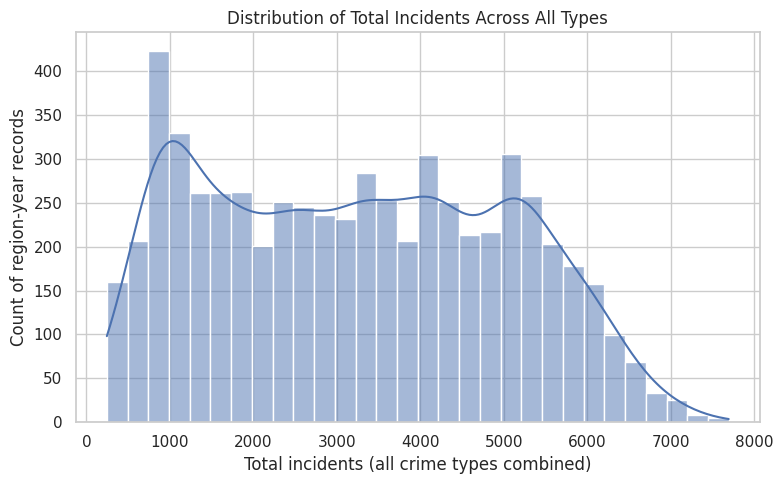

In [22]:
# 3.3.1 Histogram of total incidents

fig_hist, ax = plt.subplots()
sns.histplot(df_clean["Total_Incidents_All_Types"], bins=30, kde=True, ax=ax)
ax.set_title("Distribution of Total Incidents Across All Types")
ax.set_xlabel("Total incidents (all crime types combined)")
ax.set_ylabel("Count of region-year records")
plt.tight_layout()
plt.show()

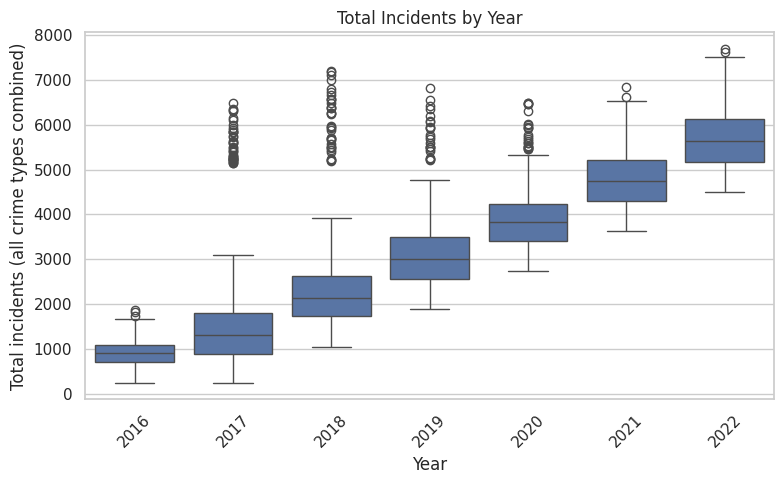

In [23]:
# 3.3.2 Boxplot of total incidents by Year (if Year is available)

if "Year" in df_clean.columns:
    fig_box, ax = plt.subplots()
    sns.boxplot(data=df_clean, x="Year", y="Total_Incidents_All_Types", ax=ax)
    ax.set_title("Total Incidents by Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Total incidents (all crime types combined)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Year' column available for boxplot.")

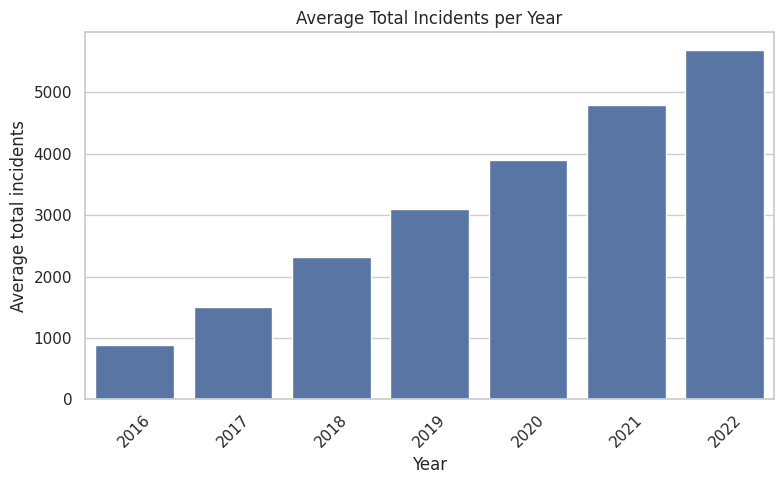

In [24]:
# 3.3.3 Bar chart: mean total incidents per year

if "Year" in df_clean.columns:
    mean_by_year = df_clean.groupby("Year")["Total_Incidents_All_Types"].mean().reset_index()

    fig_bar, ax = plt.subplots()
    sns.barplot(data=mean_by_year, x="Year", y="Total_Incidents_All_Types", ax=ax)
    ax.set_title("Average Total Incidents per Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Average total incidents")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Year' column available for yearly bar chart.")

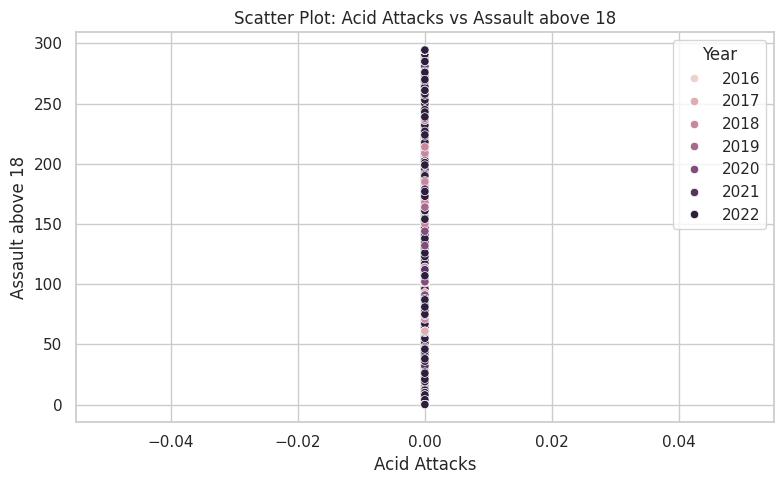

In [25]:
# 3.3.4 Scatter plot between two numeric variables

# Pick two numeric features (other than Year) for scatter plot
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
numeric_no_year = [c for c in numeric_cols if c != "Year"]

if len(numeric_no_year) >= 2:
    x_col = numeric_no_year[0]
    y_col = numeric_no_year[1]

    fig_scatter, ax = plt.subplots()
    sns.scatterplot(data=df_clean, x=x_col, y=y_col, hue="Year" if "Year" in df_clean.columns else None, ax=ax)
    ax.set_title(f"Scatter Plot: {x_col} vs {y_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a scatter plot.")

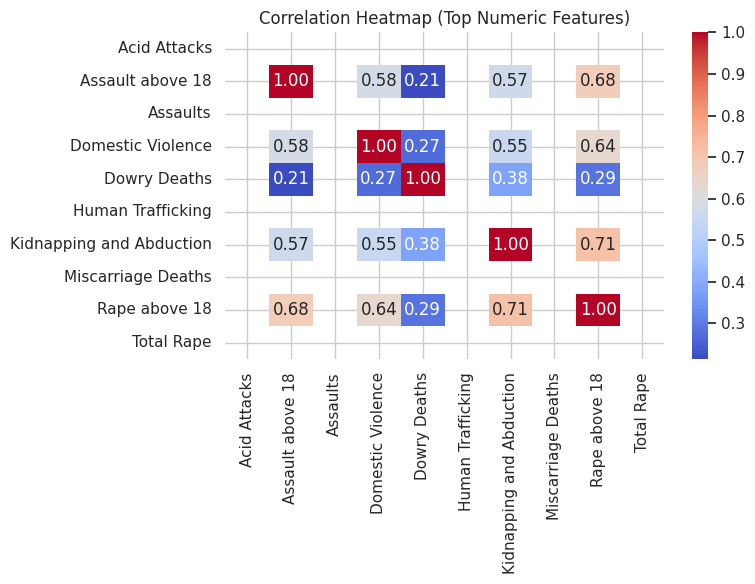

In [26]:
# 3.3.5 Correlation heatmap of top numeric features

corr_matrix = df_clean.select_dtypes(include=np.number).corr()

# To keep the plot readable, limit to the first 10 numeric columns
cols_for_corr = corr_matrix.columns[:10]
corr_subset = corr_matrix.loc[cols_for_corr, cols_for_corr]

fig_corr, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap (Top Numeric Features)")
plt.tight_layout()
plt.show()

### 3.4 Interactive EDA with Plotly (dashboard-style feel)

We also create a few **interactive** Plotly charts to mimic a mini-dashboard:

- Line chart of average total incidents by year.  
- Bar chart of total incidents for top regions (if a region column exists).


In [27]:
# 3.4.1 Interactive line chart: average total incidents by year

if "Year" in df_clean.columns:
    mean_by_year = df_clean.groupby("Year")["Total_Incidents_All_Types"].mean().reset_index()

    fig_line = px.line(
        mean_by_year,
        x="Year",
        y="Total_Incidents_All_Types",
        title="Interactive: Average Total Incidents by Year"
    )
    fig_line.update_traces(mode="markers+lines")
    fig_line.update_layout(xaxis_title="Year",
                           yaxis_title="Average total incidents")
    fig_line.show()
else:
    print("No 'Year' column available for interactive time series.")

In [28]:
# 3.4.2 Interactive bar chart by region (if a suitable geographic column exists)

region_col_candidates = [c for c in df_clean.columns
                         if any(keyword in c.lower() for keyword in ["state", "district", "region"])]
region_col = region_col_candidates[0] if region_col_candidates else None

if region_col is not None:
    top_regions = (df_clean.groupby(region_col)["Total_Incidents_All_Types"]
                           .sum()
                           .sort_values(ascending=False)
                           .head(10)
                           .reset_index())

    fig_region_bar = px.bar(
        top_regions,
        x=region_col,
        y="Total_Incidents_All_Types",
        title=f"Top 10 {region_col} by Total Incidents",
        labels={region_col: region_col, "Total_Incidents_All_Types": "Total incidents (all years)"}
    )
    fig_region_bar.show()
else:
    print("No obvious region/state/district column found for interactive bar chart.")

---
## 4. Statistical Analysis & Machine Learning

In this section we:

1. Choose a **target variable** related to crimes against women.  
2. Perform an **inferential statistical test** (one-way ANOVA) to compare the target across years.  
3. Build a **predictive machine learning model** (Random Forest Regressor) to predict the target from other features.


### 4.1 Choosing the target variable

We want a target that summarizes the magnitude of crimes against women per row.

A natural choice is:

- **`Total_Incidents_All_Types`** (engineered earlier) – total incidents across all numeric crime categories.

If this column is not available for some reason, we fall back to another numeric column that appears to represent totals (e.g., one whose name contains `"total"`). The code below prints the column actually used as the target.


In [29]:
# 4.1 Select the target variable programmatically

numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

if "Total_Incidents_All_Types" in df_clean.columns:
    target_col = "Total_Incidents_All_Types"
else:
    # Try to find a column containing 'total'
    candidate_targets = [c for c in numeric_cols if "total" in c.lower()]
    if candidate_targets:
        target_col = candidate_targets[0]
    else:
        # Fallback: just pick the first numeric column (not ideal, but ensures the notebook runs)
        target_col = numeric_cols[0]

print(f"Selected target variable for analysis and modeling: {target_col}")

Selected target variable for analysis and modeling: Total_Incidents_All_Types


### 4.2 Statistical test – One‑Way ANOVA across years

We test whether the **mean value of the target variable differs significantly across years**.

- **Null hypothesis (H₀):** The mean target value is the same for all years.  
- **Alternative hypothesis (H₁):** At least one year has a different mean target value.

We use **one-way ANOVA** from `scipy.stats.f_oneway`.  
This requires at least two distinct years.


In [30]:
# 4.2 One-way ANOVA: Does the mean target differ by year?

if "Year" in df_clean.columns and df_clean["Year"].nunique() >= 2:
    groups = []
    year_labels = []

    for year, group in df_clean.groupby("Year"):
        # Use the target column; we already know we are not treating 0 as missing
        values = group[target_col].values
        if len(values) > 0:
            groups.append(values)
            year_labels.append(year)

    if len(groups) >= 2:
        F_stat, p_value = stats.f_oneway(*groups)
        print("One-way ANOVA results:")
        print("F-statistic:", F_stat)
        print("p-value:", p_value)
        if p_value < 0.05:
            print("\nConclusion: Reject H0 at 5% significance.")
            print("There is evidence that the mean target differs across at least one pair of years.")
        else:
            print("\nConclusion: Fail to reject H0 at 5% significance.")
            print("We do not have strong evidence that the mean target differs by year.")
    else:
        print("Not enough non-empty year groups for ANOVA.")
else:
    print("ANOVA cannot be performed because 'Year' is missing or has only one unique value.")

One-way ANOVA results:
F-statistic: 4856.614246359036
p-value: 0.0

Conclusion: Reject H0 at 5% significance.
There is evidence that the mean target differs across at least one pair of years.


### 4.3 Machine Learning – Random Forest Regression

We now build a **Random Forest Regressor** to predict the target variable from the other features.

Steps:

1. Prepare feature matrix **X** and target vector **y** from `df_model`.  
2. Split into **train** and **test** sets (80/20).  
3. Train a `RandomForestRegressor` with a fixed `random_state` for reproducibility.  
4. Evaluate using **R²**, **MAE**, and **RMSE**.  
5. Visualize:
   - Predicted vs. actual values.  
   - Residuals.  
   - Top feature importances.


In [31]:
# 4.3 Prepare data for modeling

# Confirm that the target is in df_model
assert target_col in df_model.columns, f"Target column '{target_col}' not found in df_model"

X = df_model.drop(columns=[target_col])
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4911, 1838)
Test set shape: (1228, 1838)


In [32]:
# 4.3.1 Train Random Forest Regressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

Random Forest model trained.


In [ ]:
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Removed squared=False
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE

print(f"R^2 score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R^2 score: 0.9988
Mean Absolute Error (MAE): 40.34
Root Mean Squared Error (RMSE): 64.22


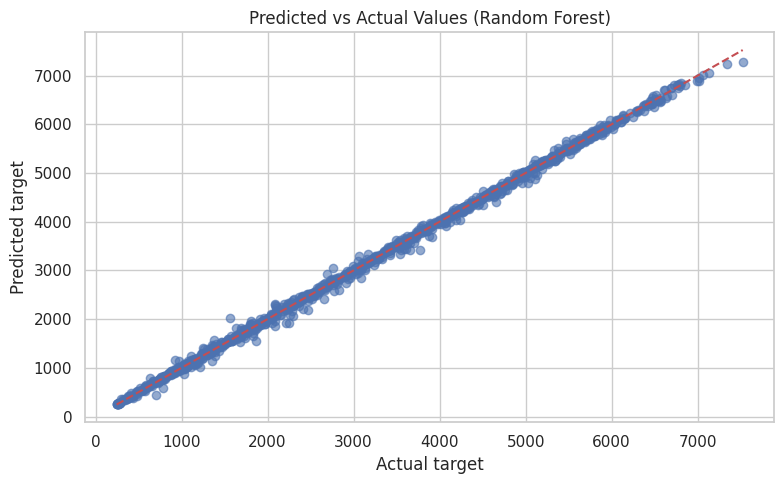

In [ ]:
# 4.3.3 Plot predicted vs actual

fig_pred, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
ax.set_title("Predicted vs Actual Values (Random Forest)")
ax.set_xlabel("Actual target")
ax.set_ylabel("Predicted target")
plt.tight_layout()
plt.show()

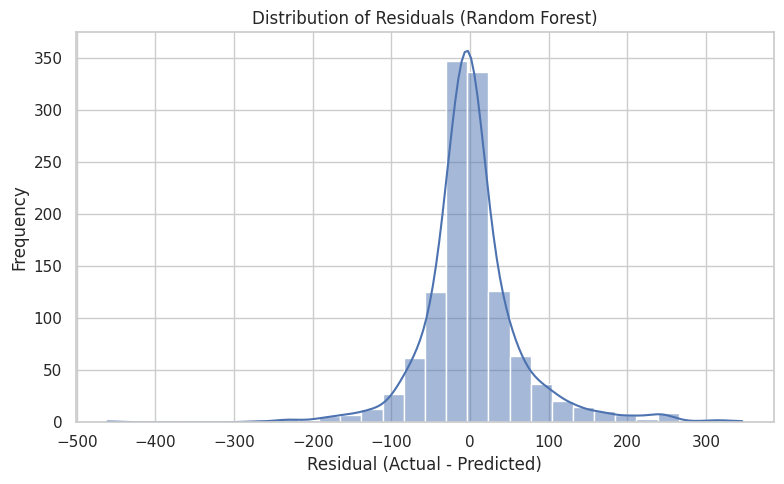

In [ ]:
# 4.3.4 Plot residuals

residuals = y_test - y_pred

fig_resid, ax = plt.subplots()
sns.histplot(residuals, bins=30, kde=True, ax=ax)
ax.set_title("Distribution of Residuals (Random Forest)")
ax.set_xlabel("Residual (Actual - Predicted)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

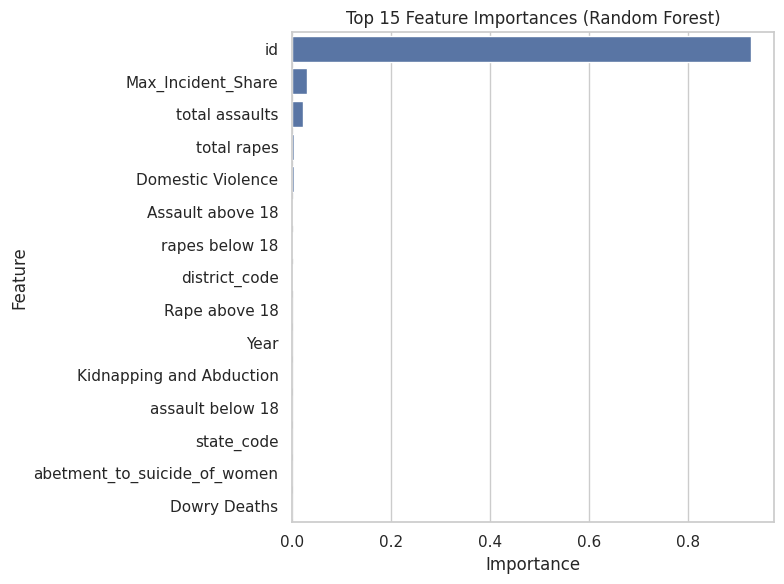

In [ ]:
# 4.3.5 Feature importance plot

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(15)

fig_imp, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=top_importances.values, y=top_importances.index, ax=ax)
ax.set_title("Top 15 Feature Importances (Random Forest)")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

---
## 5. Data Visualization & Dashboard‑Style Views (Summary)

By now, we have already produced many visualizations using **Matplotlib**, **Seaborn**, and **Plotly**, including:

1. Histogram of total incidents.  
2. Boxplot and bar chart of total incidents by year.  
3. Scatter plot between two numeric features.  
4. Correlation heatmap.  
5. Interactive line chart of average total incidents over years.  
6. Interactive bar chart for top regions.  
7. Model‑diagnostic plots (predicted vs actual, residual distribution).  

Together these function as a **lightweight analytical dashboard** that helps stakeholders explore patterns and model behavior.


In [33]:
# 9.1 Save cleaned data to CSV

output_csv_path = "women_crimes_cleaned.csv"
df_clean.to_csv(output_csv_path, index=False)
print(f"Cleaned data saved to: {output_csv_path}")

Cleaned data saved to: women_crimes_cleaned.csv


In [34]:
# 9.2 Save a few key plots as PNG files
# (We recreate the figures here to ensure they are saved even if the earlier cells were not re-run.)

# Histogram of total incidents
fig_hist_export, ax = plt.subplots()
sns.histplot(df_clean["Total_Incidents_All_Types"], bins=30, kde=True, ax=ax)
ax.set_title("Distribution of Total Incidents Across All Types")
ax.set_xlabel("Total incidents (all crime types combined)")
ax.set_ylabel("Count of region-year records")
plt.tight_layout()
fig_hist_export.savefig("plot_hist_total_incidents.png", dpi=300)
plt.close(fig_hist_export)

# Bar chart: mean total incidents per year
if "Year" in df_clean.columns:
    mean_by_year = df_clean.groupby("Year")["Total_Incidents_All_Types"].mean().reset_index()

    fig_bar_export, ax = plt.subplots()
    sns.barplot(data=mean_by_year, x="Year", y="Total_Incidents_All_Types", ax=ax)
    ax.set_title("Average Total Incidents per Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Average total incidents")
    plt.xticks(rotation=45)
    plt.tight_layout()
    fig_bar_export.savefig("plot_bar_mean_by_year.png", dpi=300)
    plt.close(fig_bar_export)

# Feature importance bar chart (requires rf_model to be trained)
try:
    importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    top_importances = importances.sort_values(ascending=False).head(15)

    fig_imp_export, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=top_importances.values, y=top_importances.index, ax=ax)
    ax.set_title("Top 15 Feature Importances (Random Forest)")
    ax.set_xlabel("Importance")
    ax.set_ylabel("Feature")
    plt.tight_layout()
    fig_imp_export.savefig("plot_feature_importances.png", dpi=300)
    plt.close(fig_imp_export)
except NameError:
    print("Random Forest model not found. Run the modeling section before exporting feature importance plot.")

print("PNG files saved in the current working directory (where this notebook is located).")

PNG files saved in the current working directory (where this notebook is located).


With these exports, the project becomes **reusable**:

- The cleaned CSV can be loaded into **Power BI**, **Tableau**, or another Python notebook.  
- The PNG plots can be embedded into a written report or slide deck.  
- The code is reproducible thanks to a fixed random seed and clearly documented steps.

> You can now download this notebook (`.ipynb`) together with the exported images and cleaned CSV as your complete lab submission.
